### This notebook is used to train and validate ML models.
#### *Use this notebook to try new model configurations*

In [1]:
from stesml.model_tools import train_and_validate_model
from stesml.model_tools import get_h_from_T_results
from stesml.model_tools import get_T_from_h_results

from stesml.data_tools import get_dataframe
from stesml.plot_tools import plot_results
from stesml.plot_tools import plot_average_error

from stesml.stes_model import stes_model

/Users/kmenear/Projects/sulfur_tes_ml/envSulfurTES/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Set the model parameters

In [2]:
data_dir = "../data/Sulfur_Models/heating/full_runs" # Data must be in csv format with one header row
model_type = 'XGBoost' # Options: NN, XGBoost, RandomForest
features = ["flow-time", "Tw", "Ti"] # List of input features. Default is ["flow-time", "Tw", "Ti"]
target = 'h' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = False # Normalize data to a mean of 0 and STD of 1
n_repeats = 1 # Number of times to repeat 5-fold CV. Each repeat gives a different shuffle.
split_test_data = False # Split data into train (64%), val (16%), and test (20%) (True) or just train (80%) and val (20%) (False)
t_max = -1
t_min = 360
truncated = False

In [3]:
parameters = stes_model.get_parameters(model_type, truncated)

### Train and validate the model with 5-fold cross-validation

In [4]:
result, addenda = train_and_validate_model(data_dir, model_type, target, metric, scale, parameters, n_repeats, random_state=7, t_min=t_min, t_max=t_max, split_test_data=split_test_data, features=features)

[01:22:52] WARNING: ../src/learner.cc:576: 
Parameters: { "num_boost_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	val-rmse:31.83760
[20]	val-rmse:2.84519
[40]	val-rmse:2.23965
[60]	val-rmse:2.00784
[80]	val-rmse:1.94801
[100]	val-rmse:1.87551
[120]	val-rmse:1.83723
[140]	val-rmse:1.82046
[160]	val-rmse:1.79430
[180]	val-rmse:1.76174
[200]	val-rmse:1.74515
[220]	val-rmse:1.73772
[240]	val-rmse:1.73130
[249]	val-rmse:1.73125
Split #0, This RMSE: 1.731255, Average RMSE: 1.7313
Split #0, This R2: 0.983037, Average R2: 0.9830
[01:25:59] WARNING: ../src/learner.cc:576: 
Parameters: { "num_boost_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passe

#### Choose the model (indexed by split number) from which you would like to see results

In [5]:
chosen_model = 3

#### Get the addendum of the chosen model

In [6]:
addendum = addenda[chosen_model]

### Get results for the chosen model

In [7]:
r2_avg = sum(result['r2'])/len(result['r2'])
print(r2_avg)

0.8686623893454429


In [8]:
y_val = addendum['y_val']
y_hat = addendum['y_hat']
scenario_index = addendum['scenario_index']
train_index = addendum['train_index']
val_index = addendum['val_index']

### Create a dataframe for the validation results

In [9]:
val_df = get_dataframe(scenario_index, val_index, t_min=t_min, t_max=t_max)

In [10]:
val_df[target+"_hat"] = y_hat

### Visualize the results

#### Average error throughout the simulation time

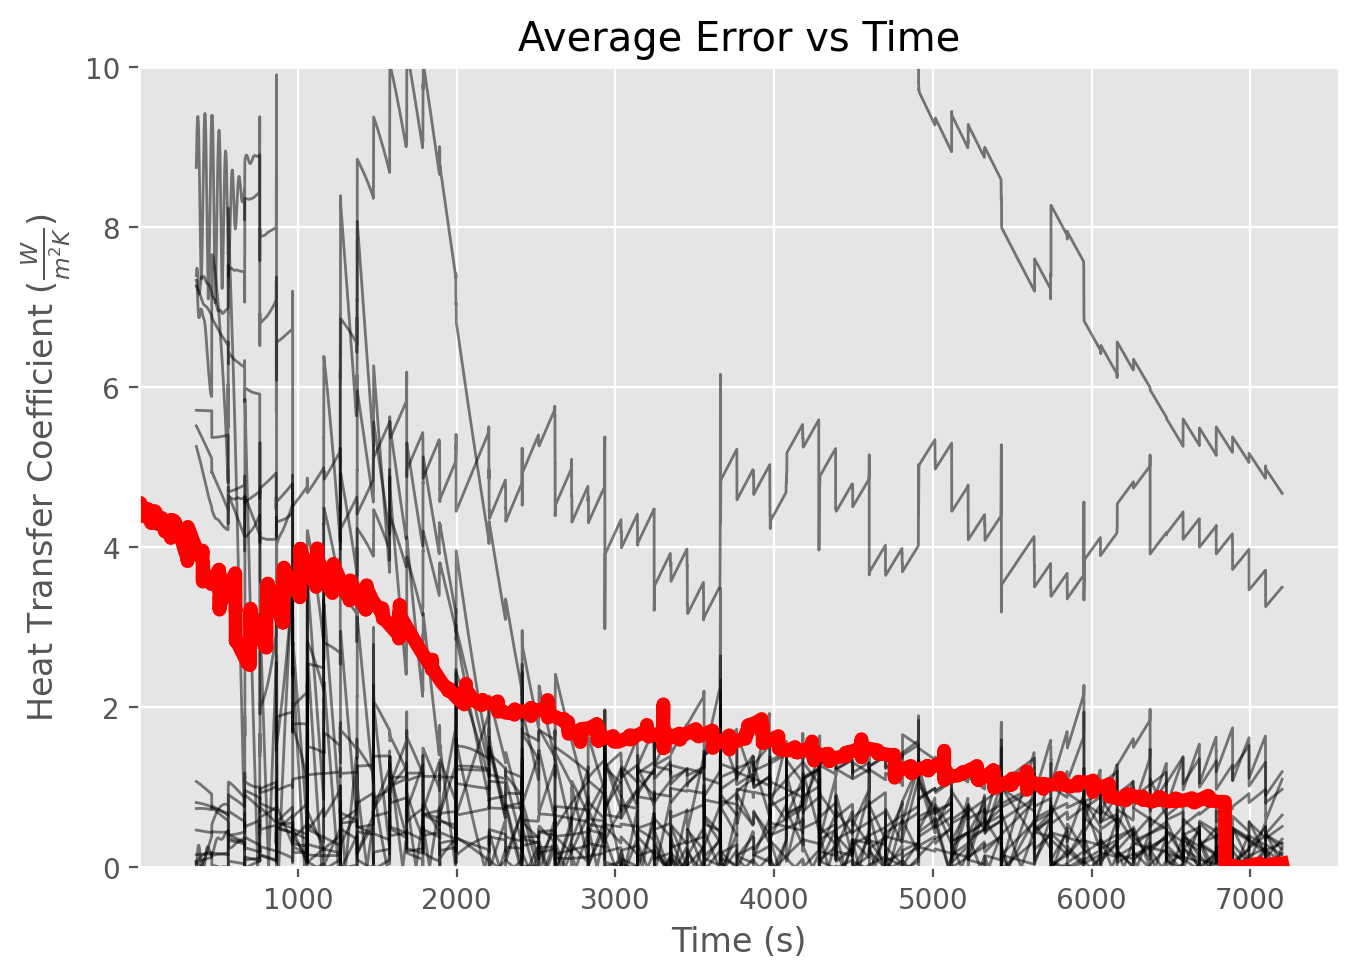

In [11]:
avg_error = plot_average_error(val_df, target=target)

#### Histogram of prediction error.

<AxesSubplot:>

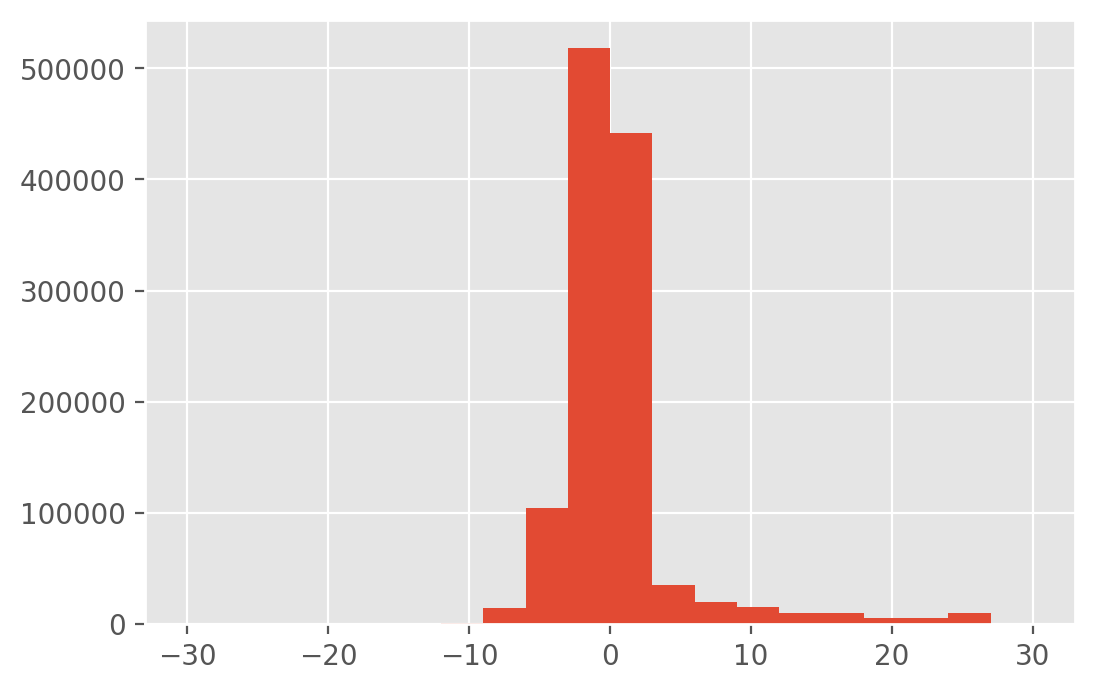

In [12]:
(val_df[target] - val_df[target+'_hat']).hist(bins=20, range=(-30, 30))

#### Plotting predictions and expectations for scenarios in the validation set.

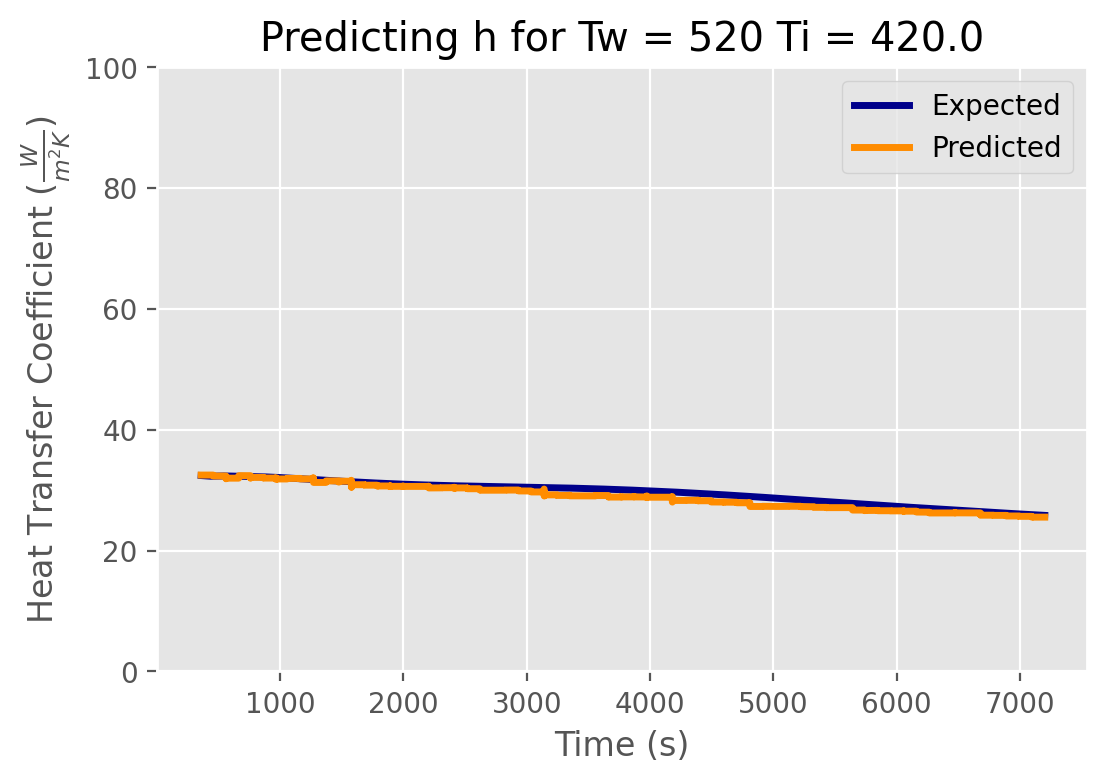

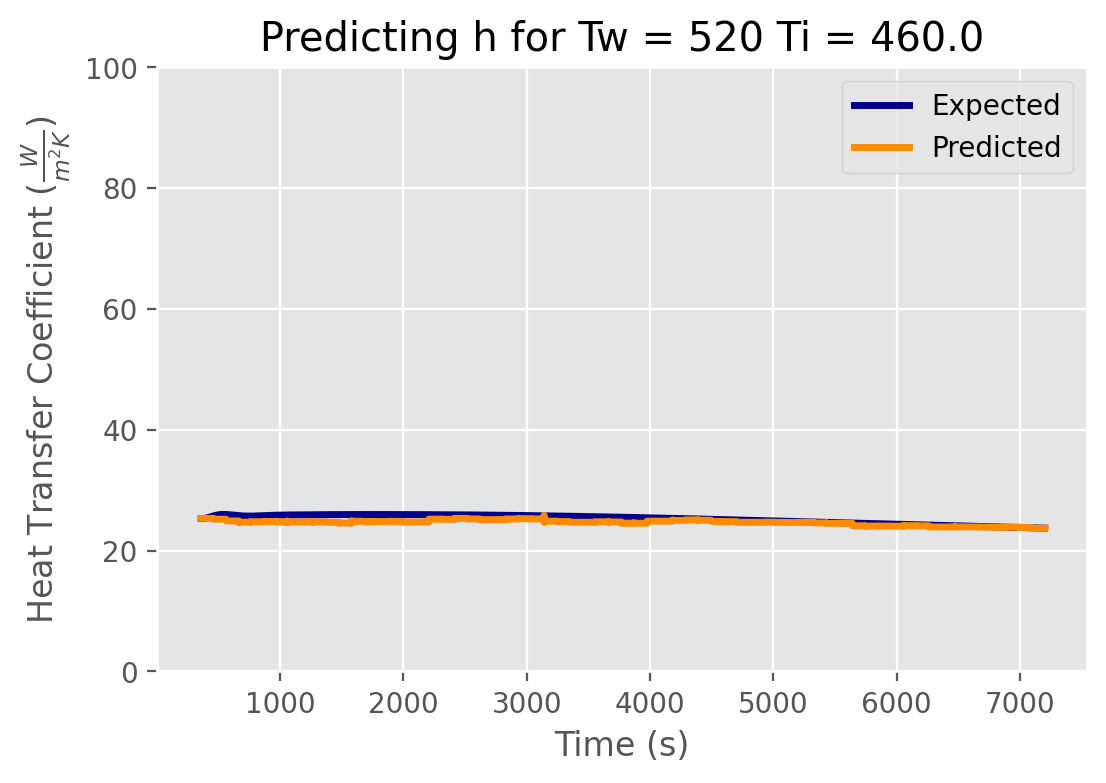

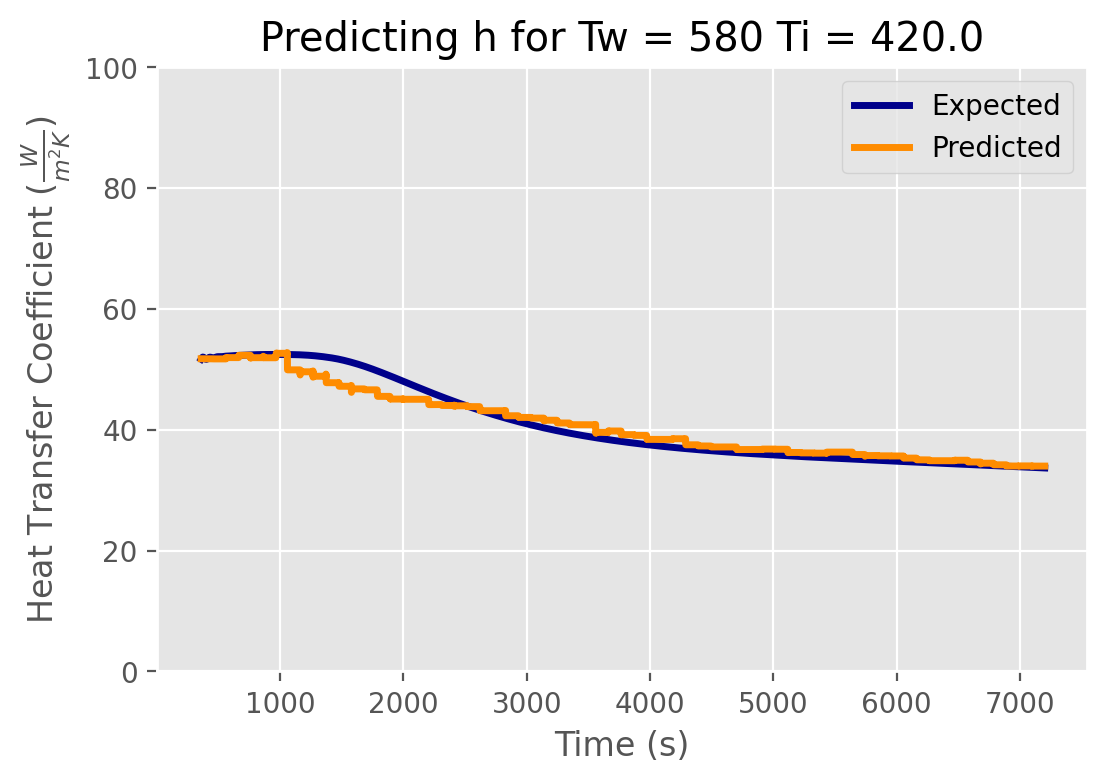

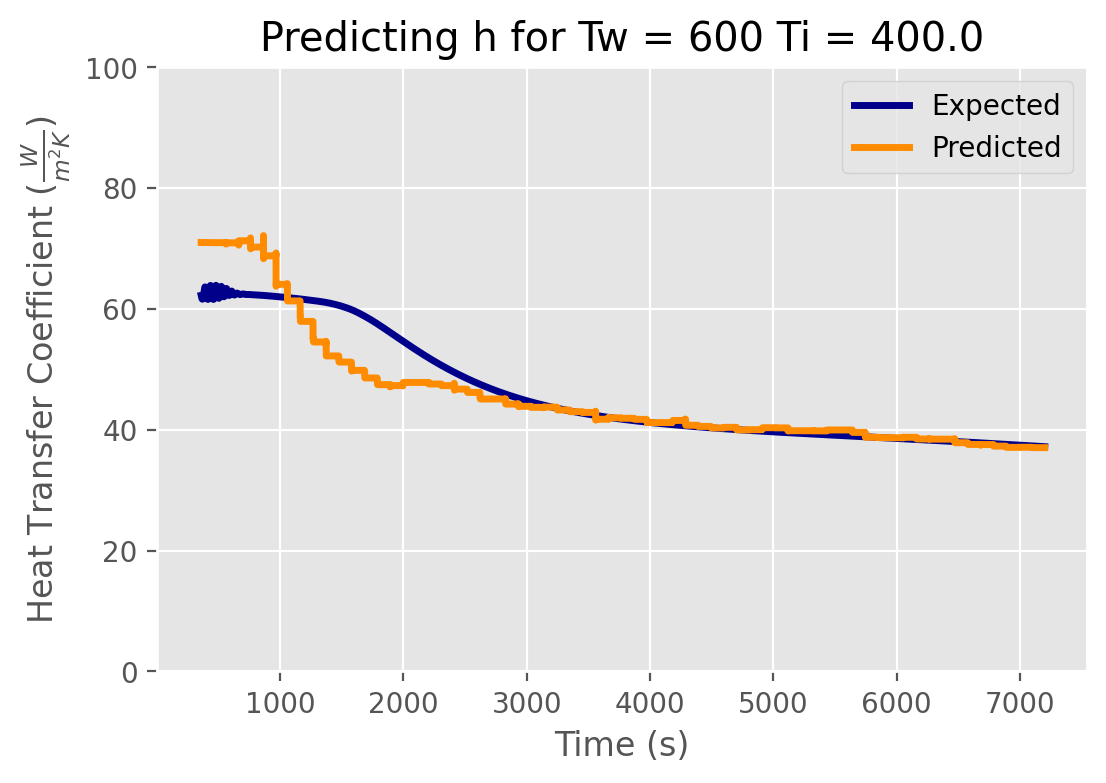

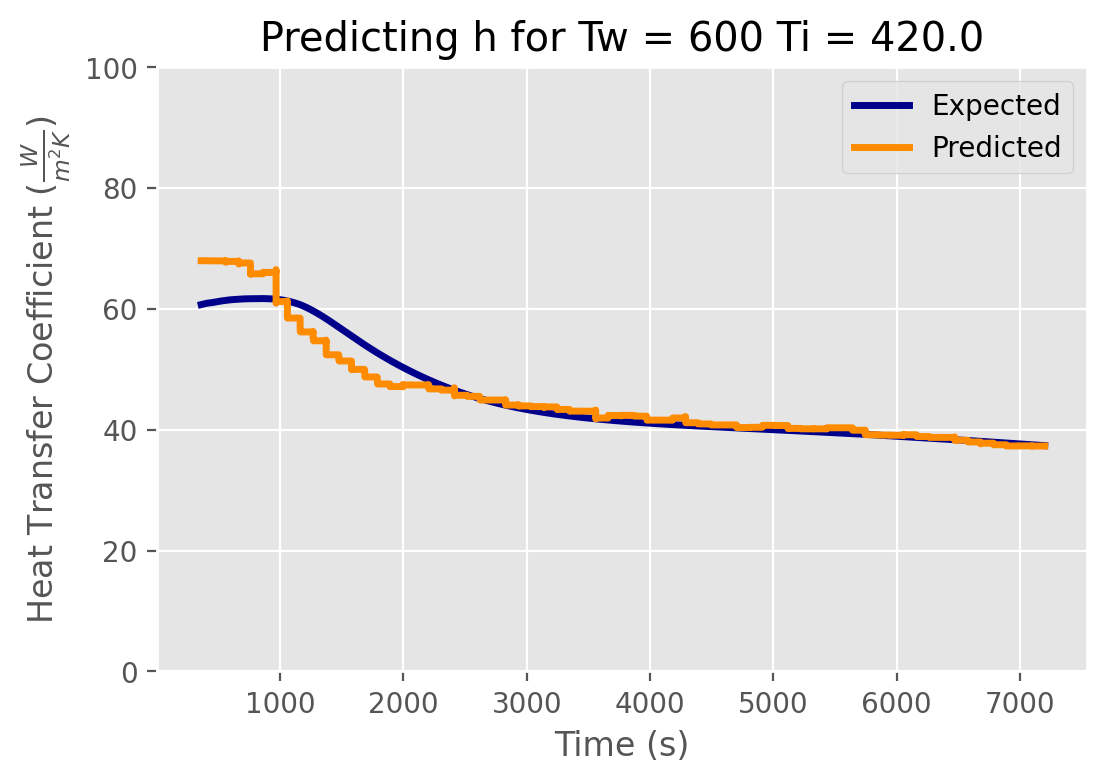

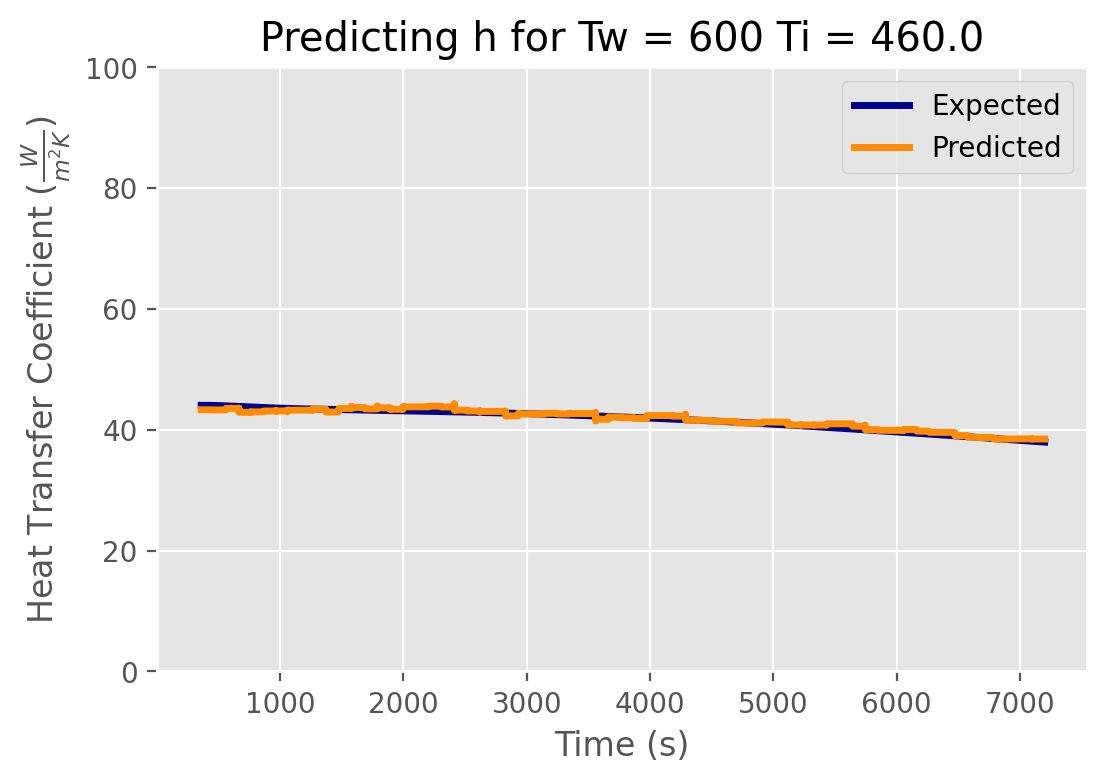

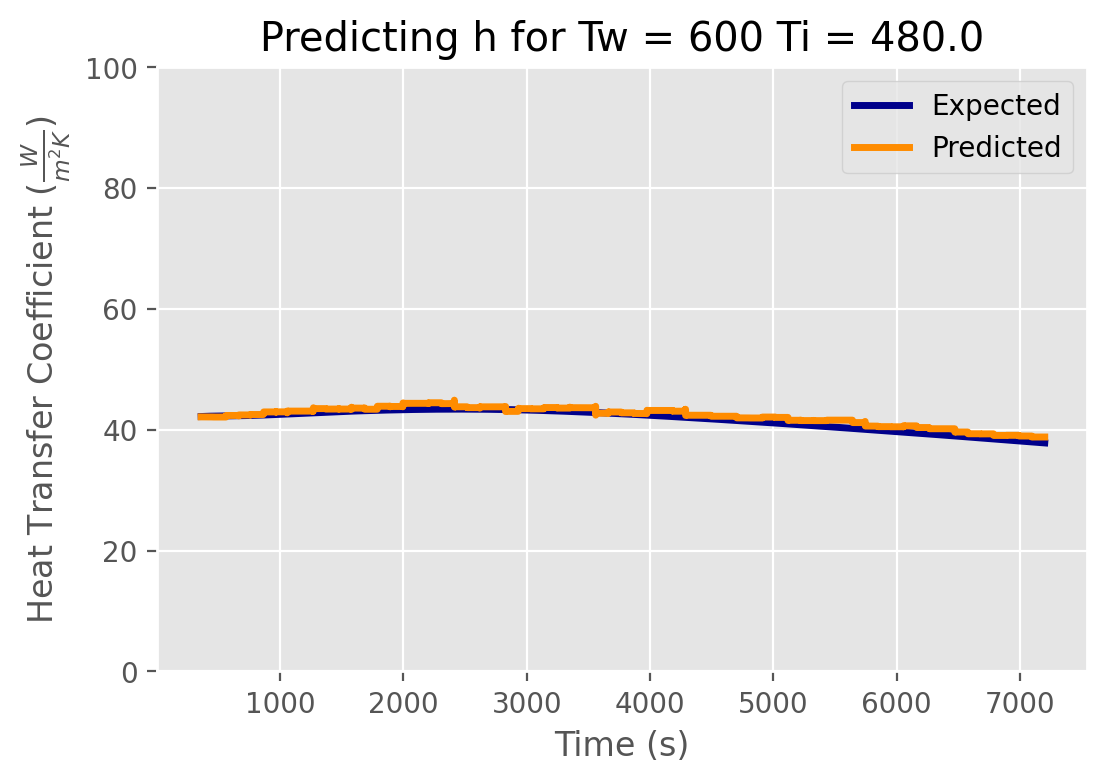

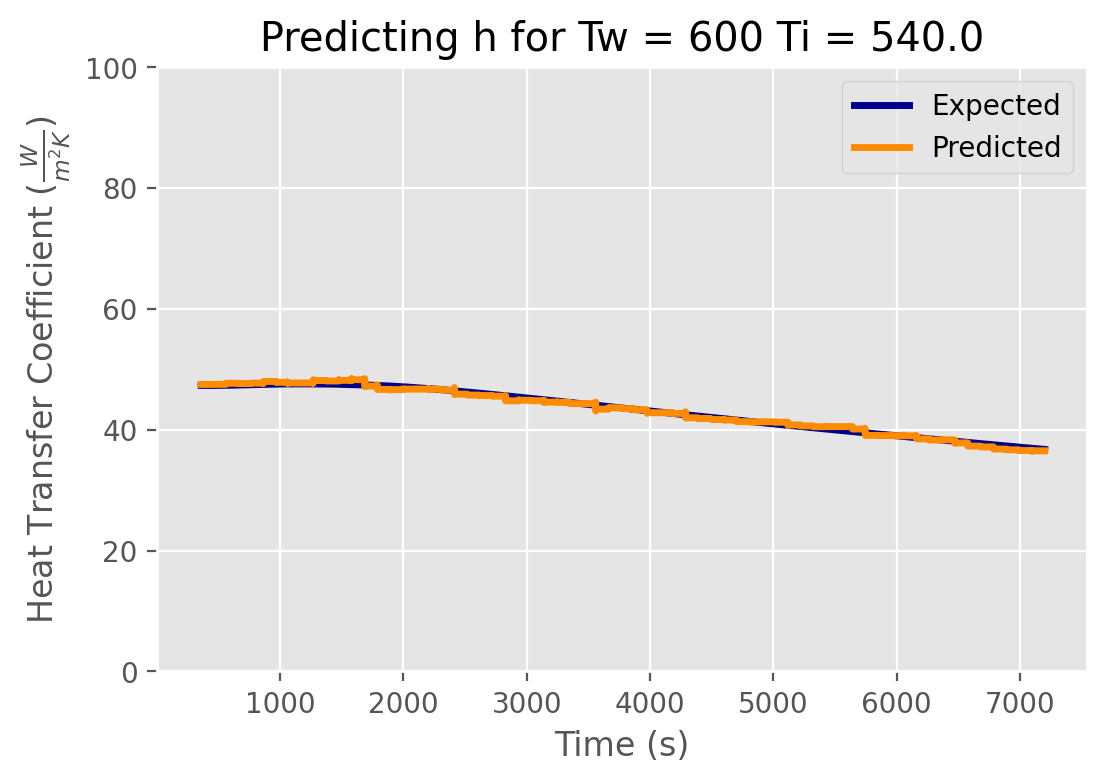

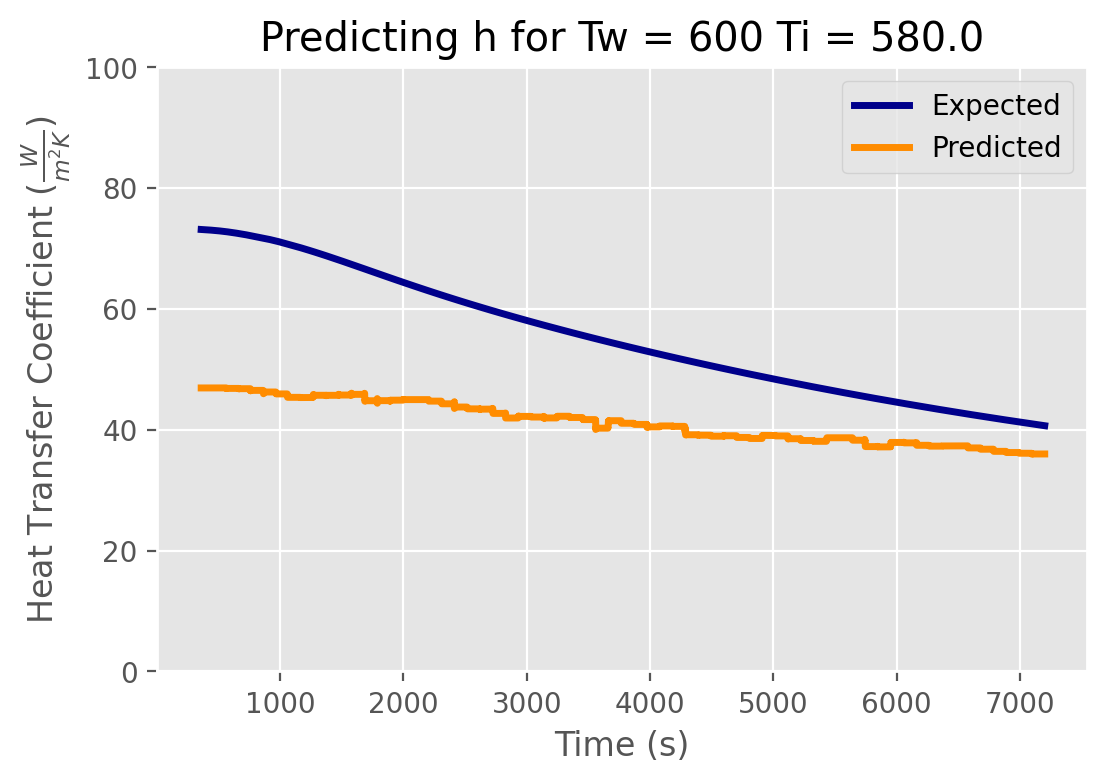

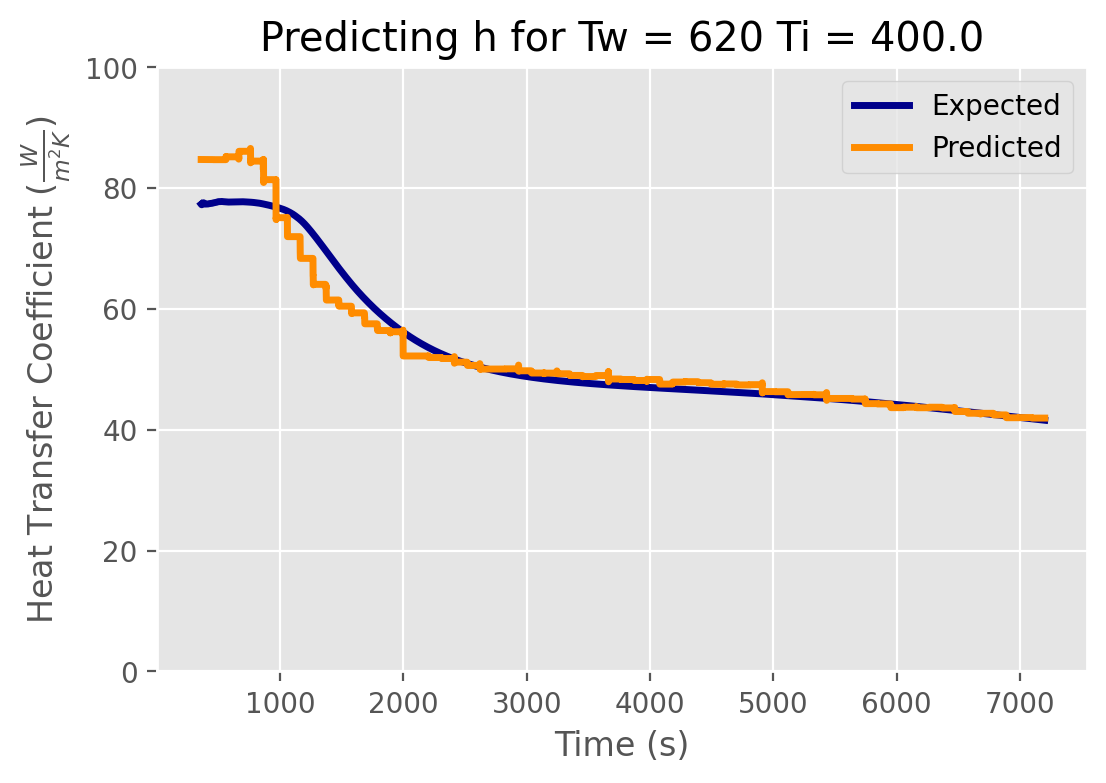

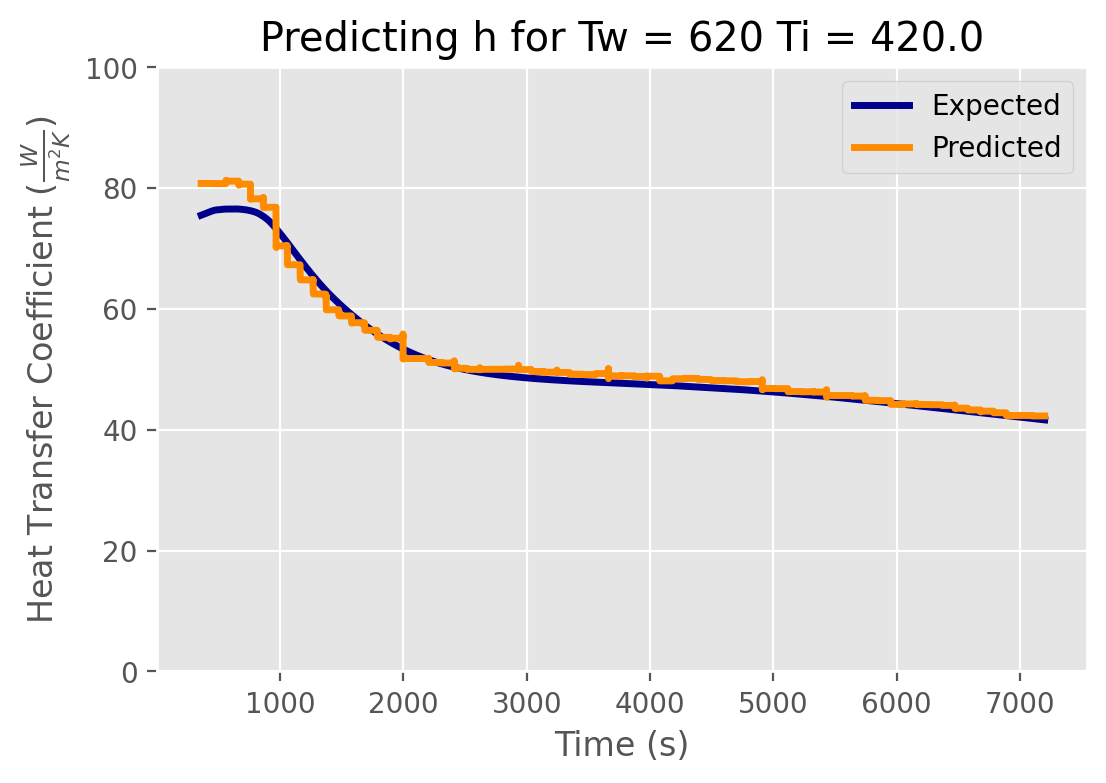

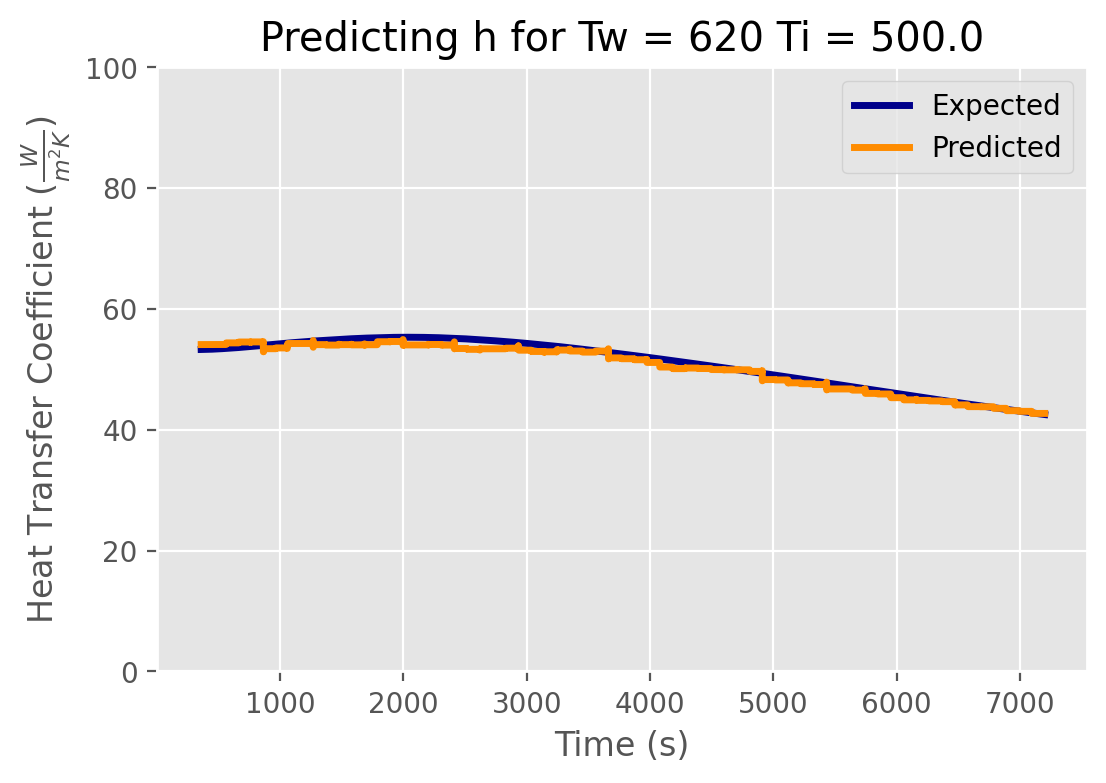

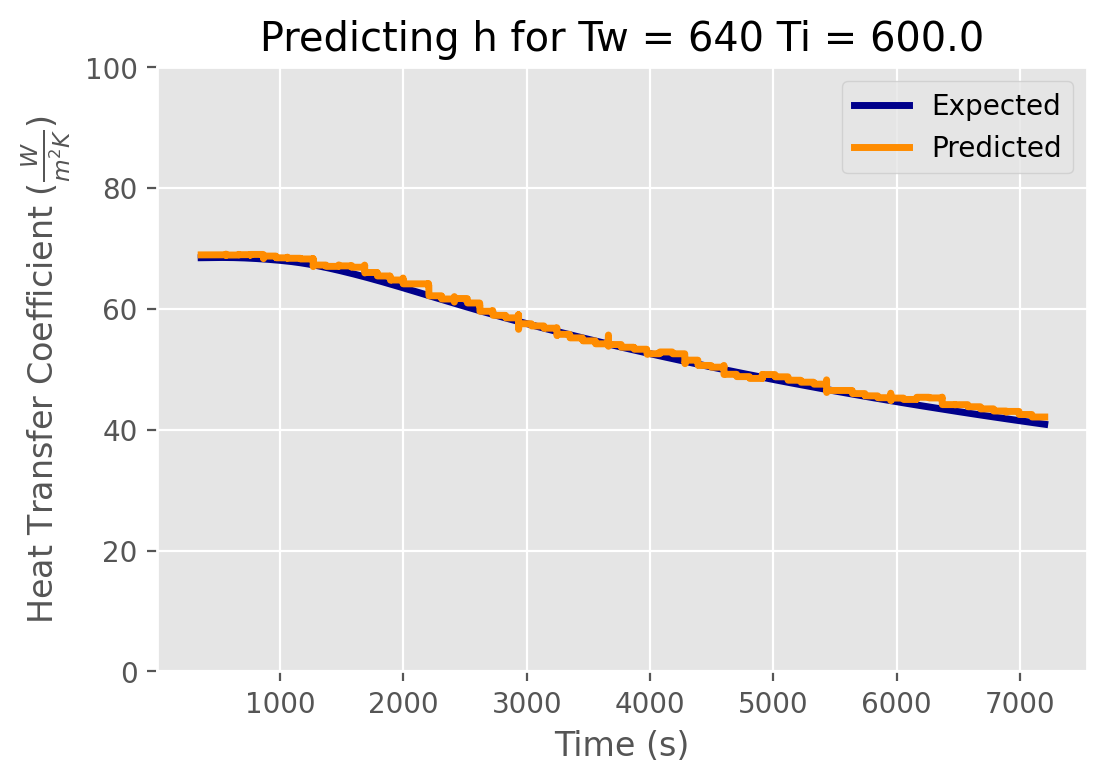

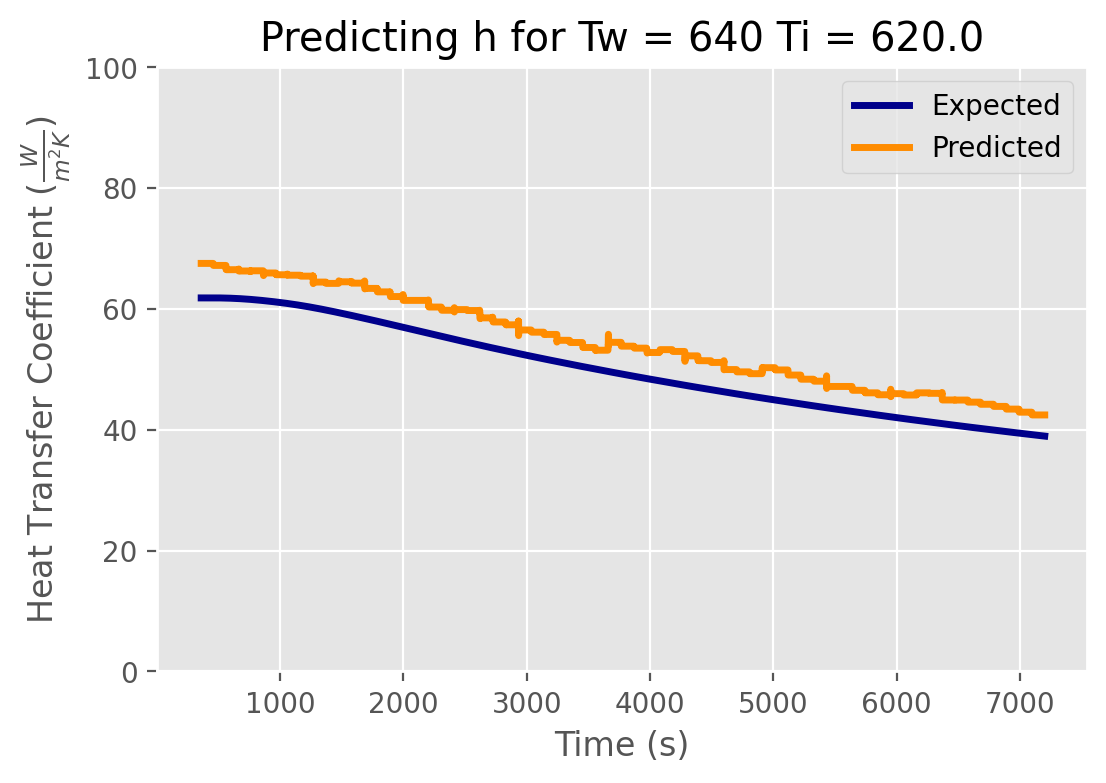

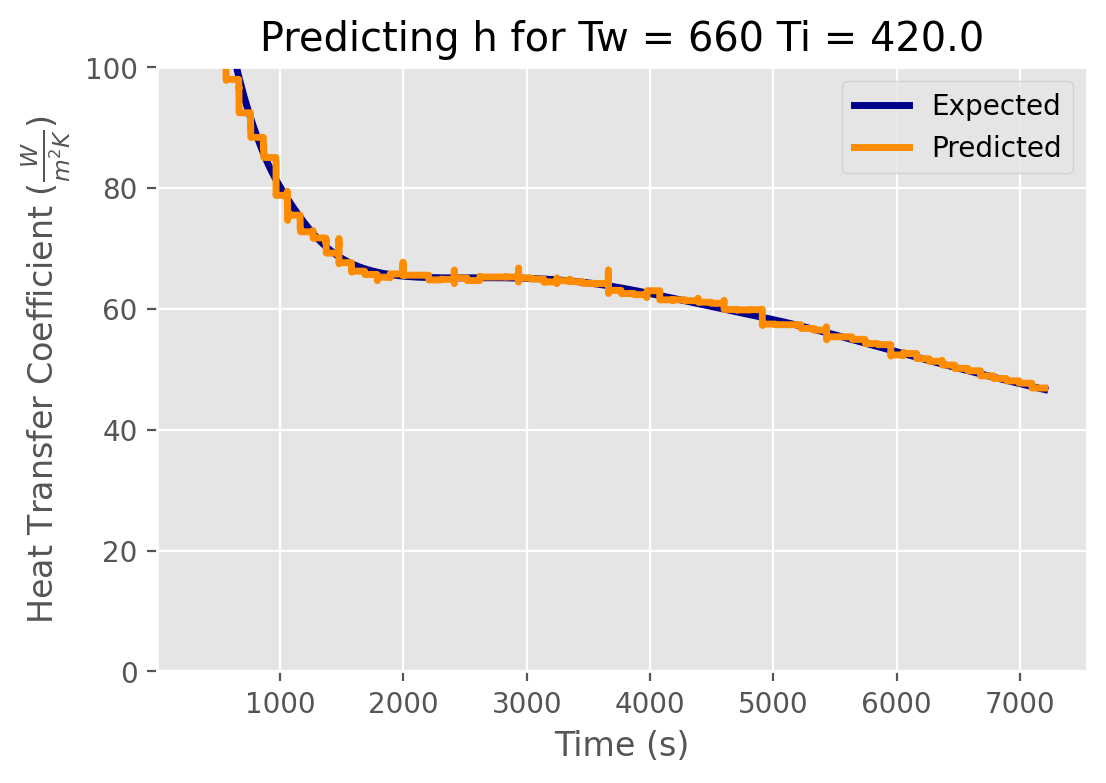

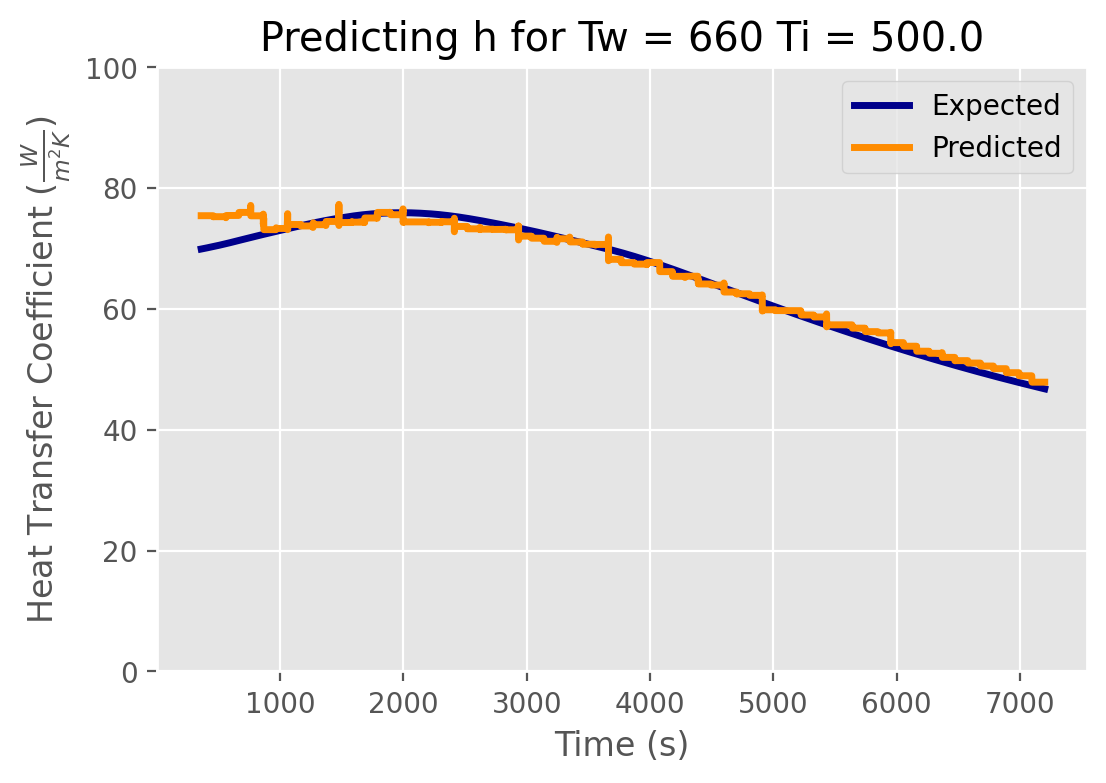

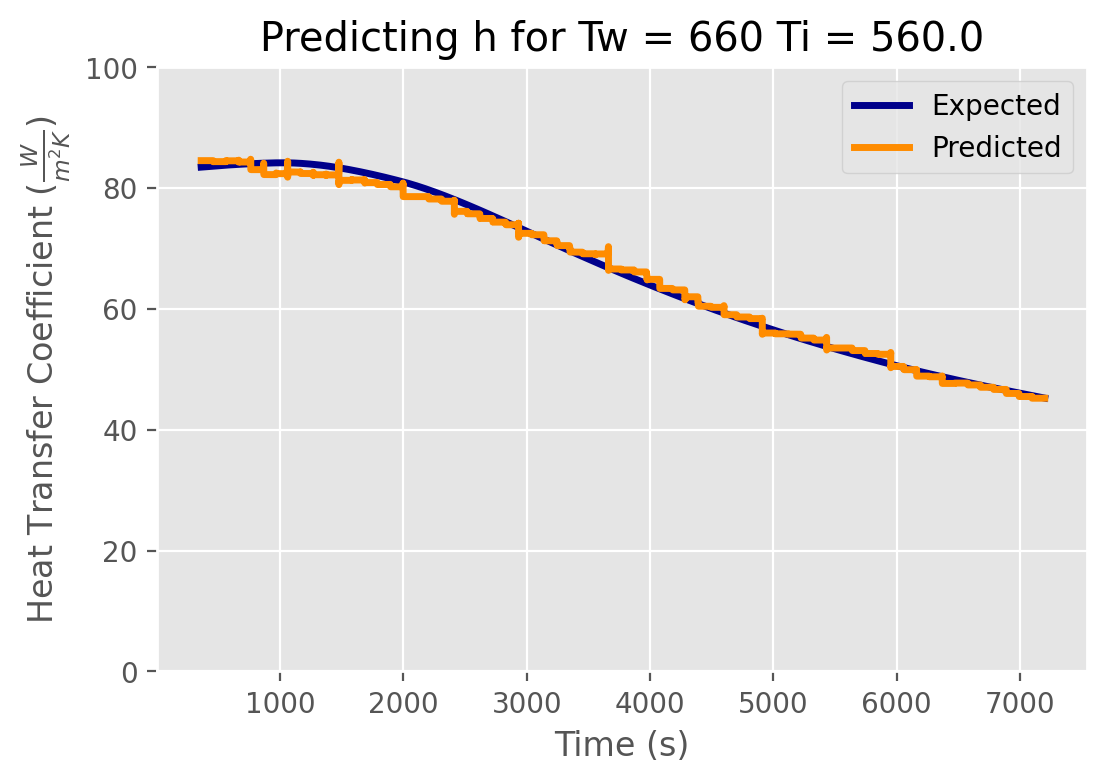

In [13]:
figures = plot_results(val_df, target)

### Calculate the opposite target from these predictions.

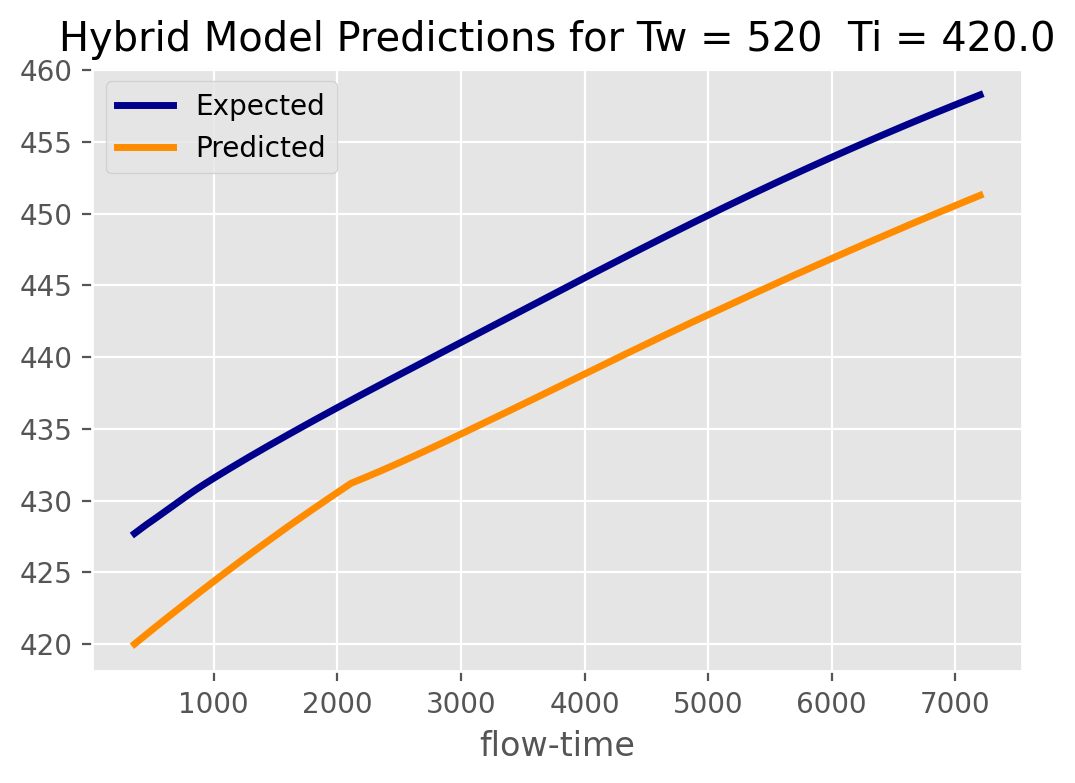

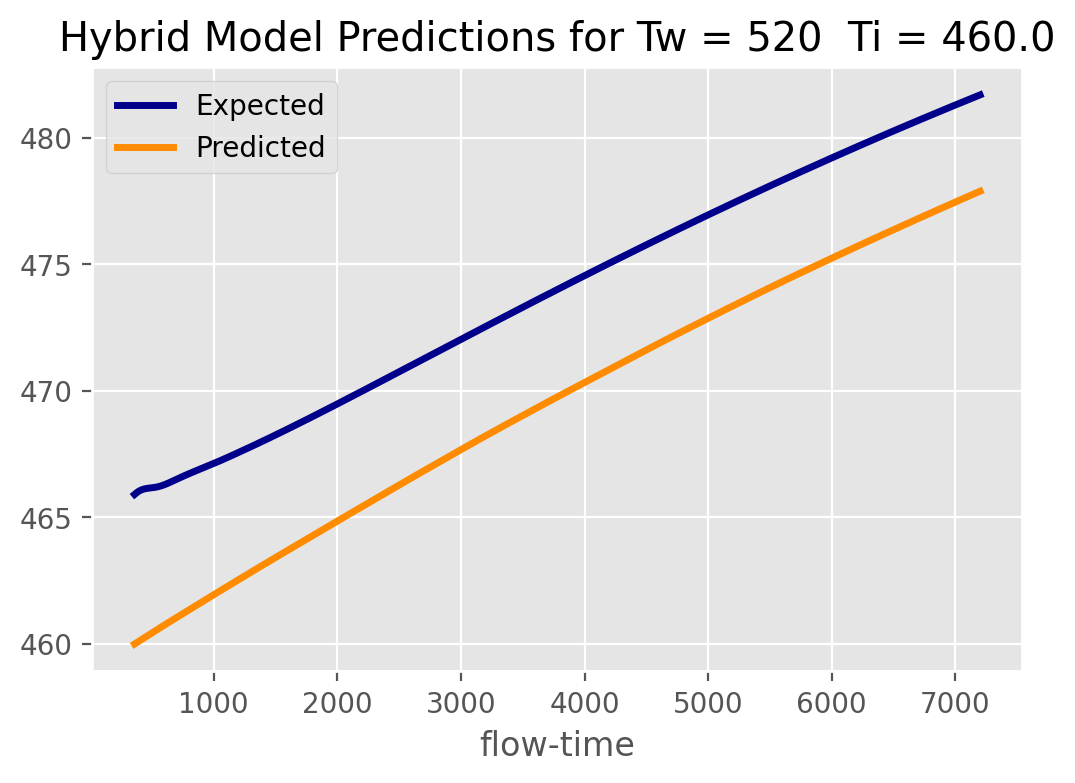

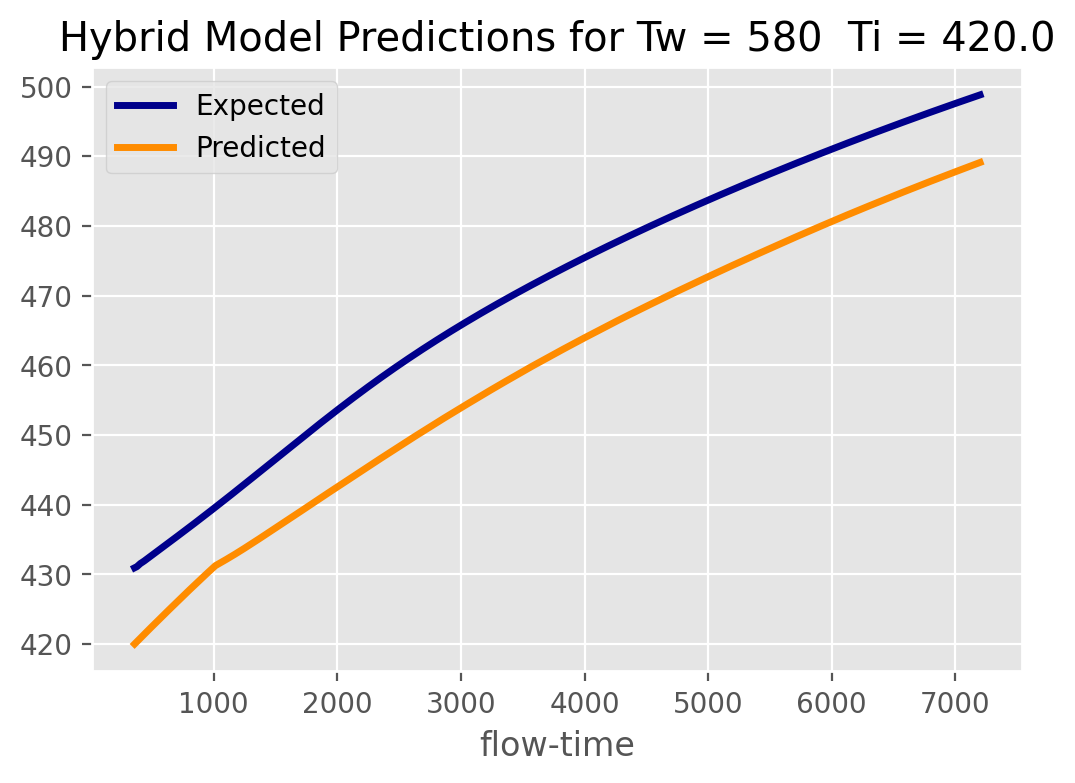

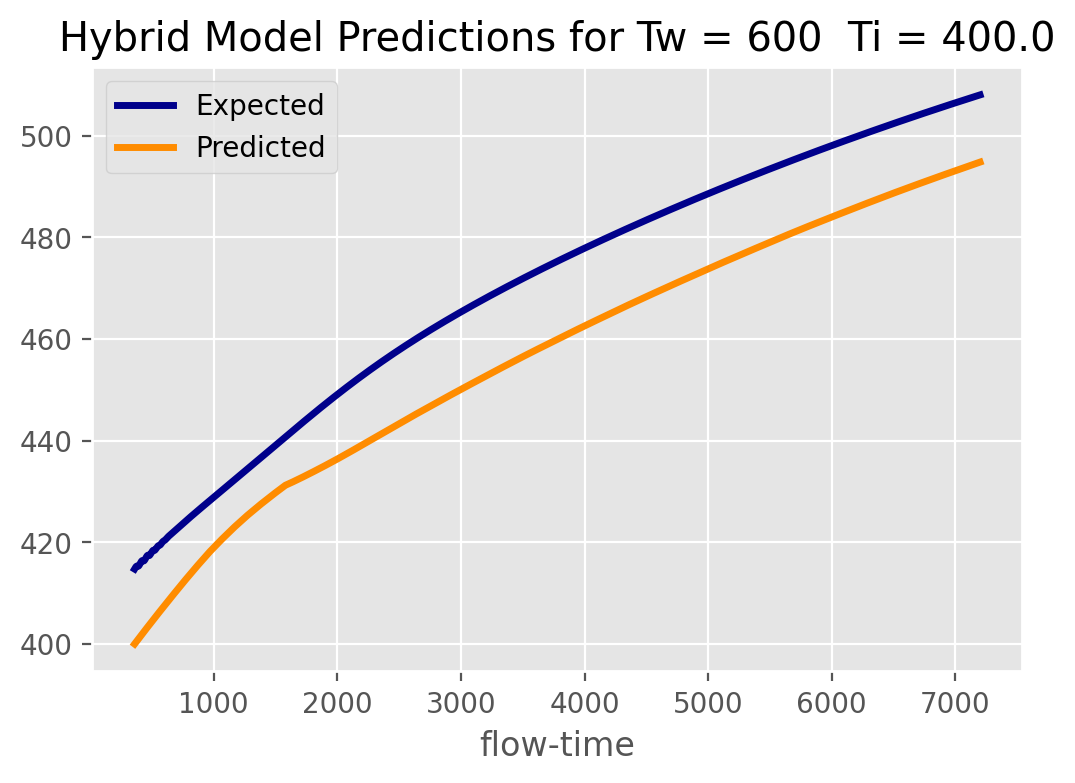

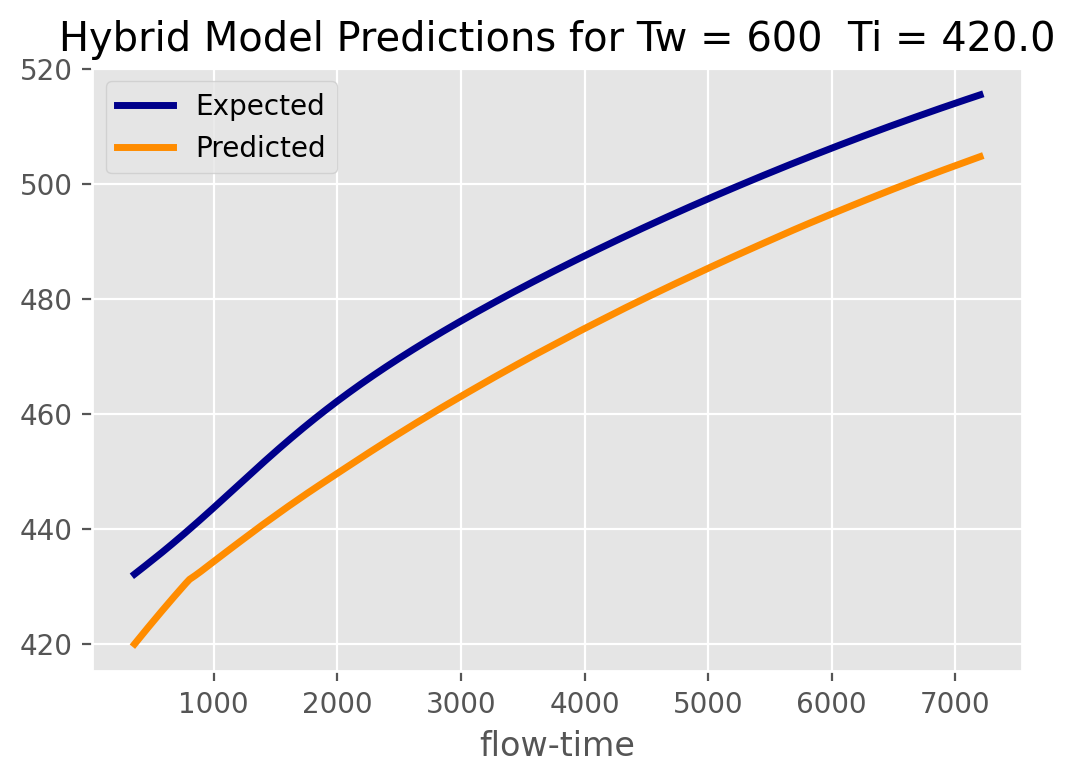

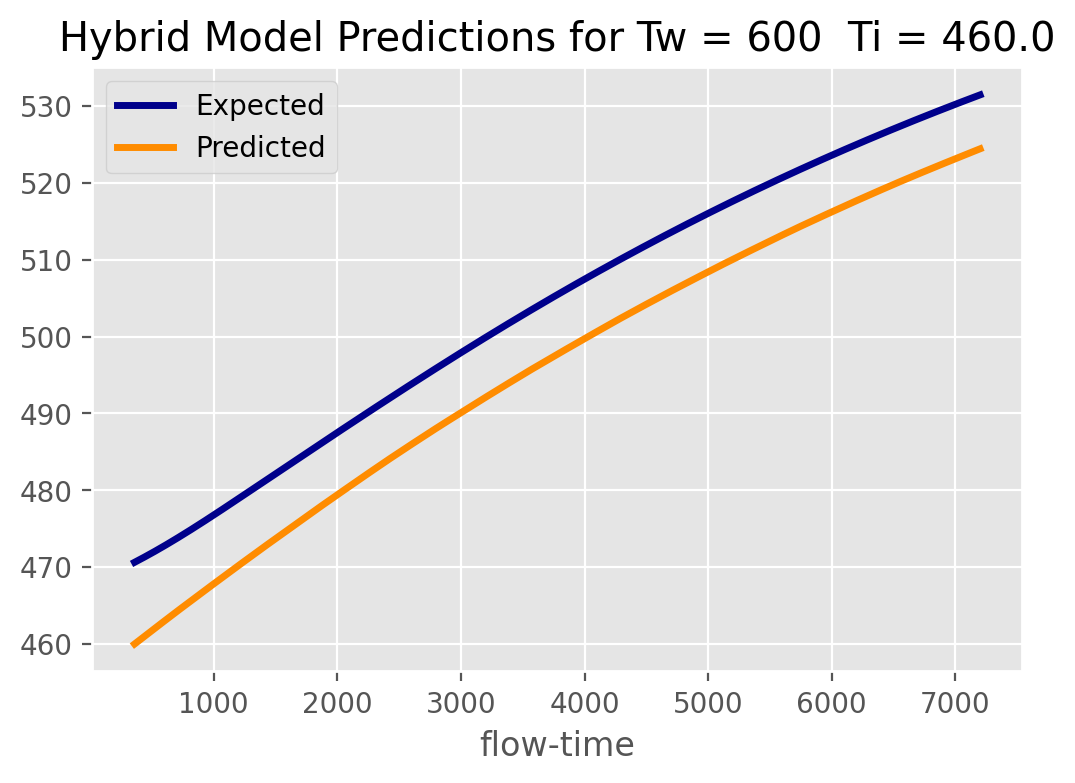

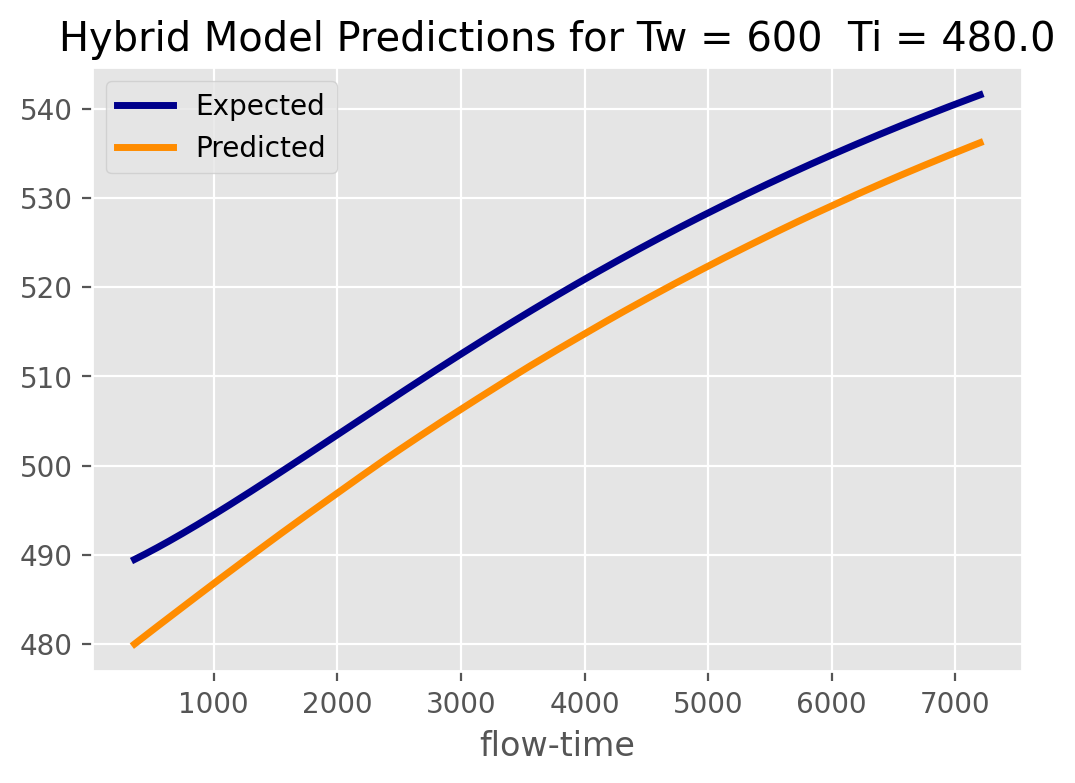

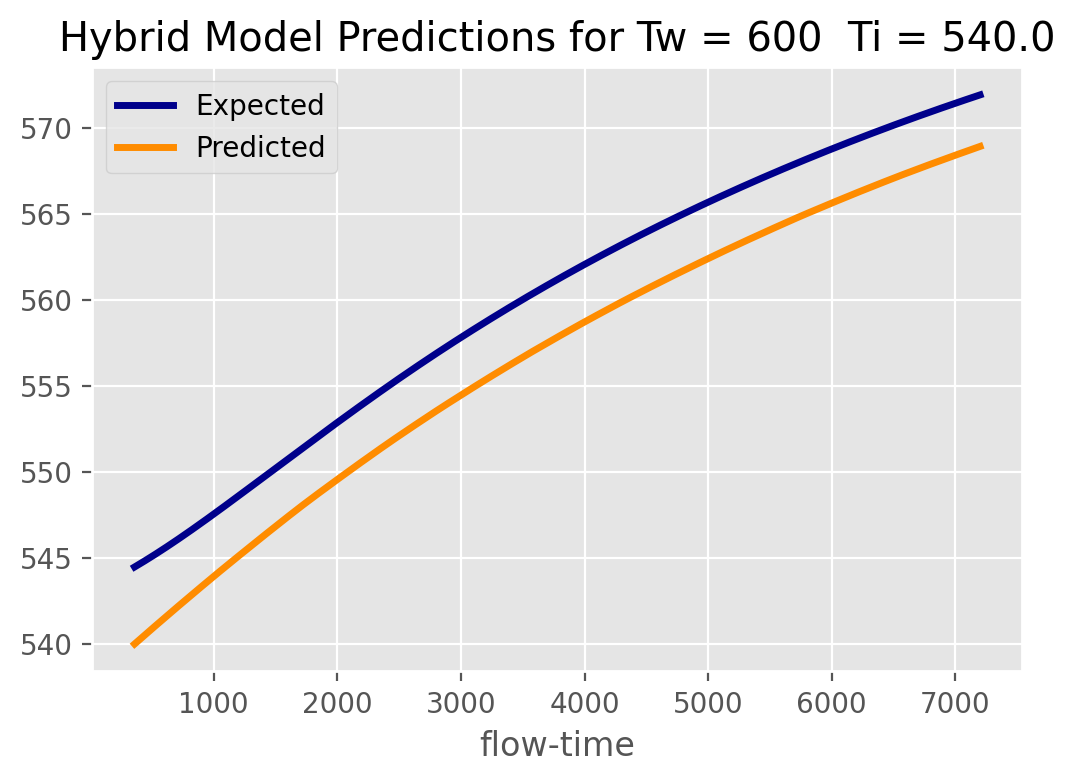

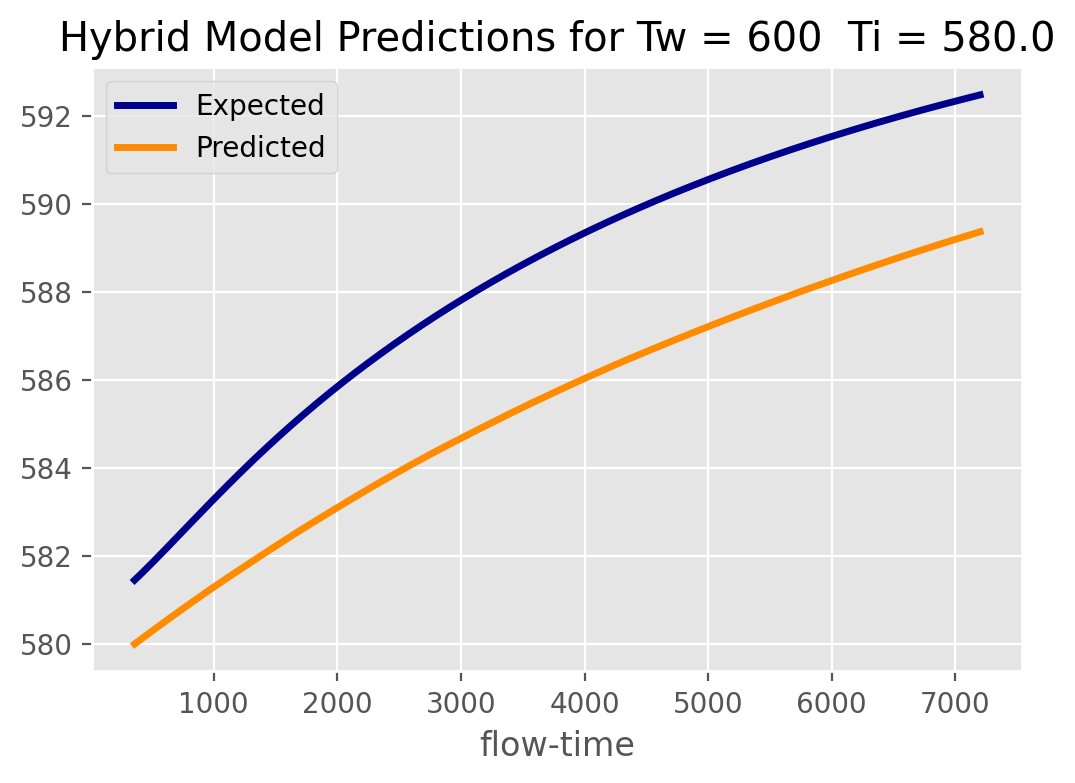

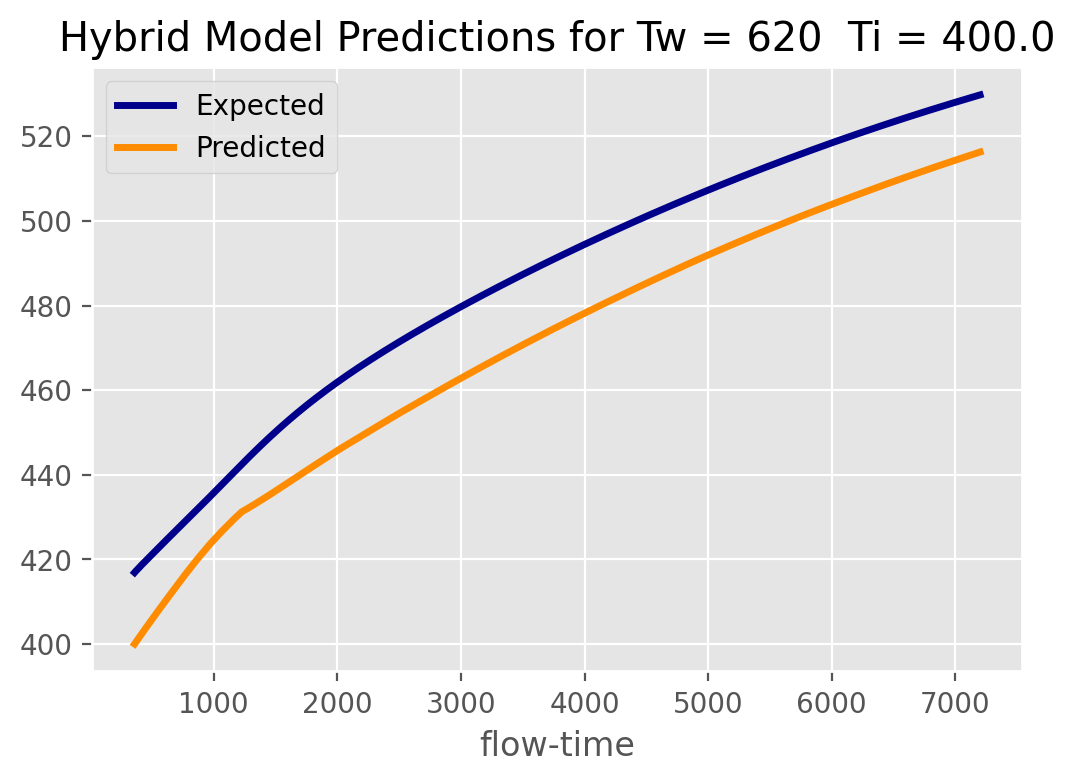

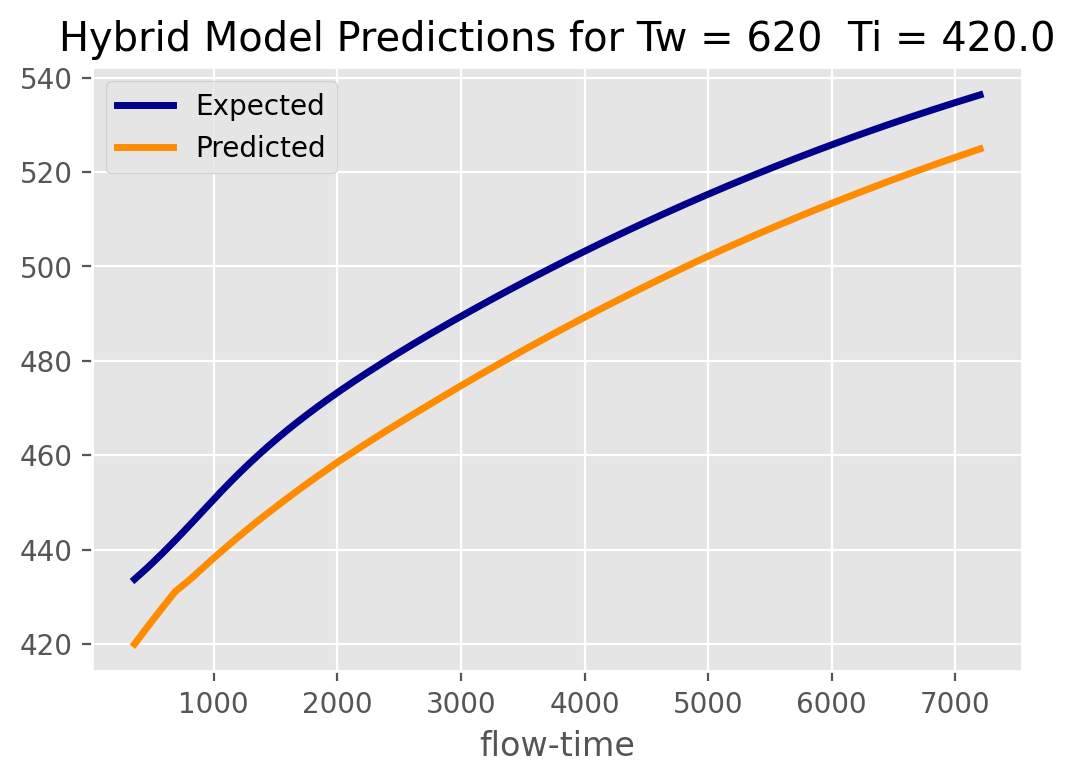

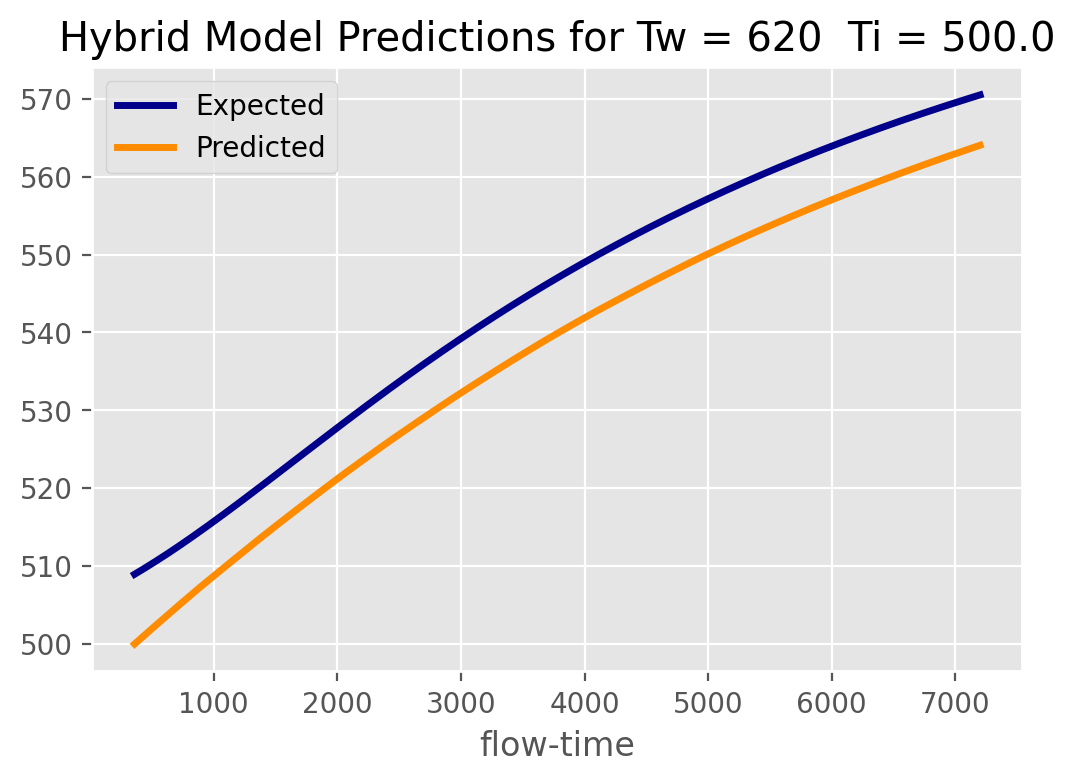

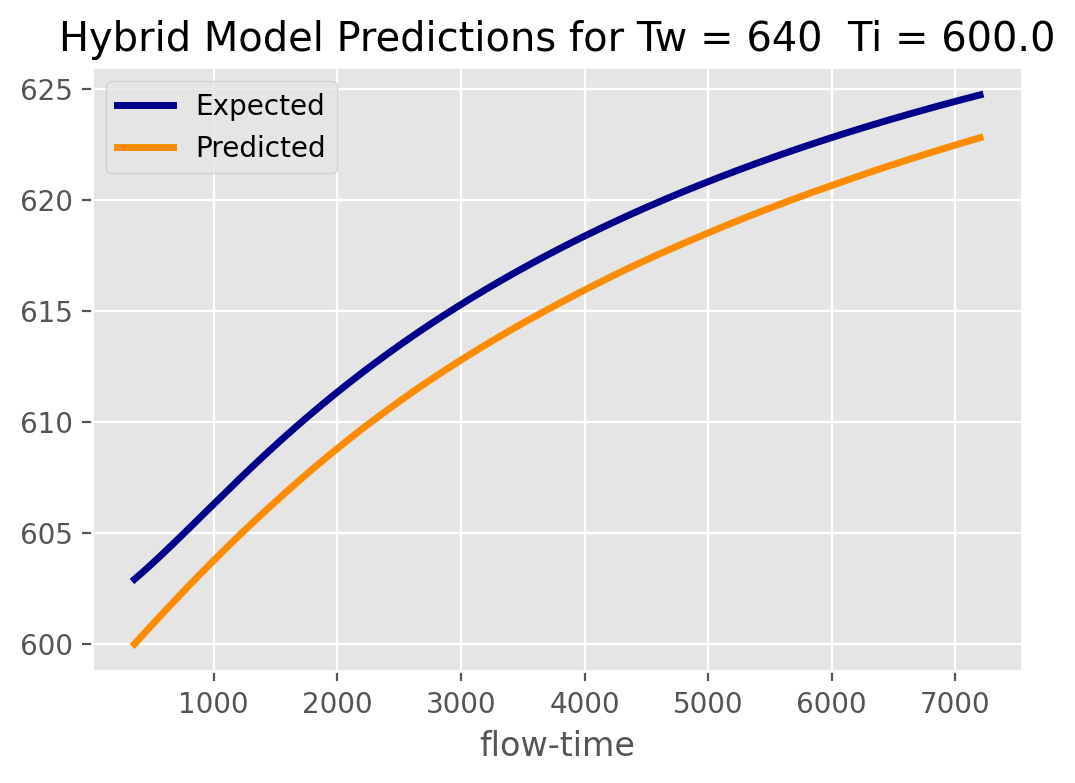

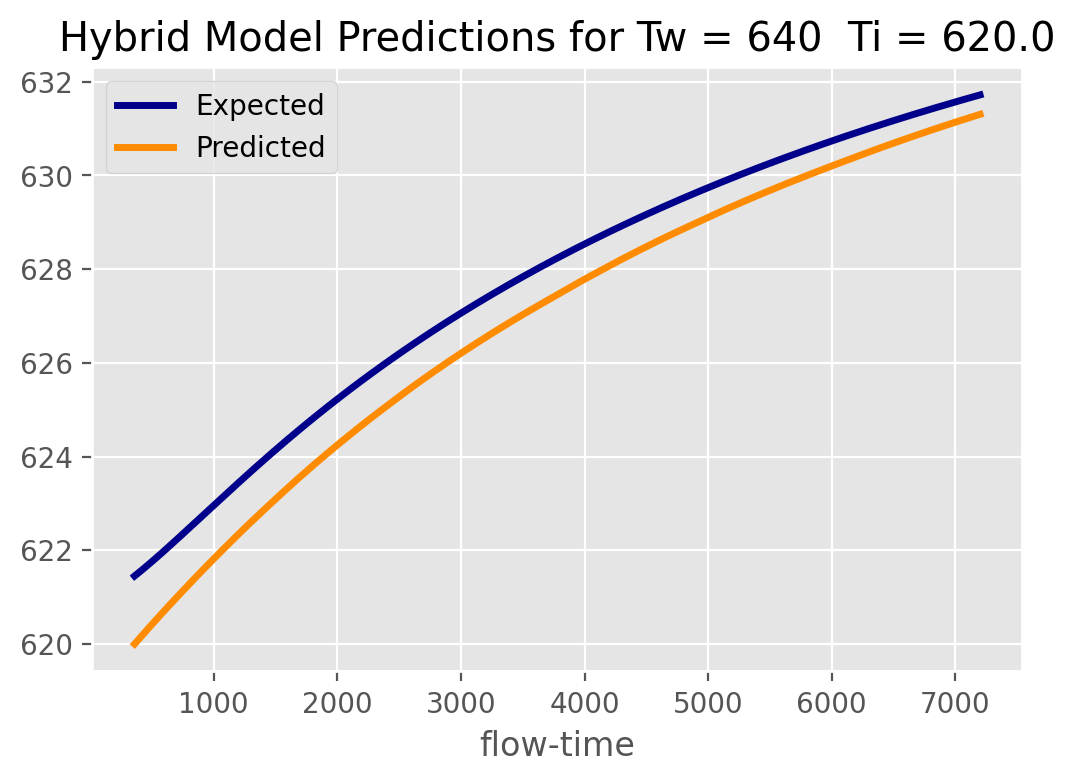

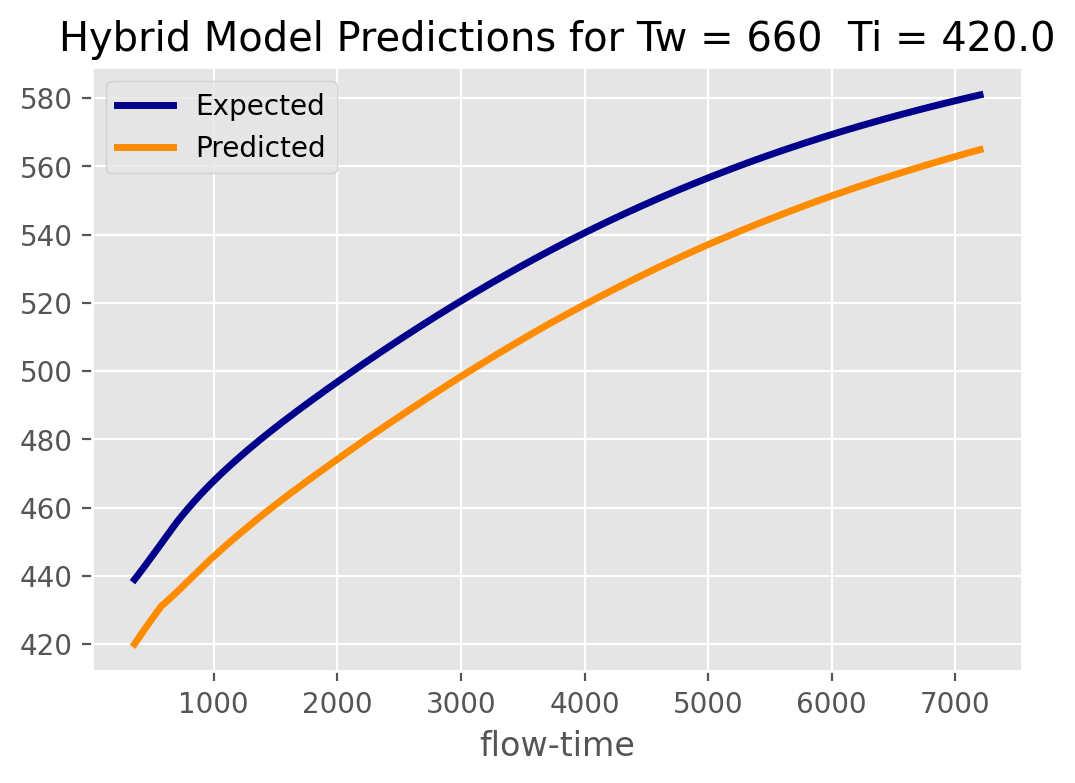

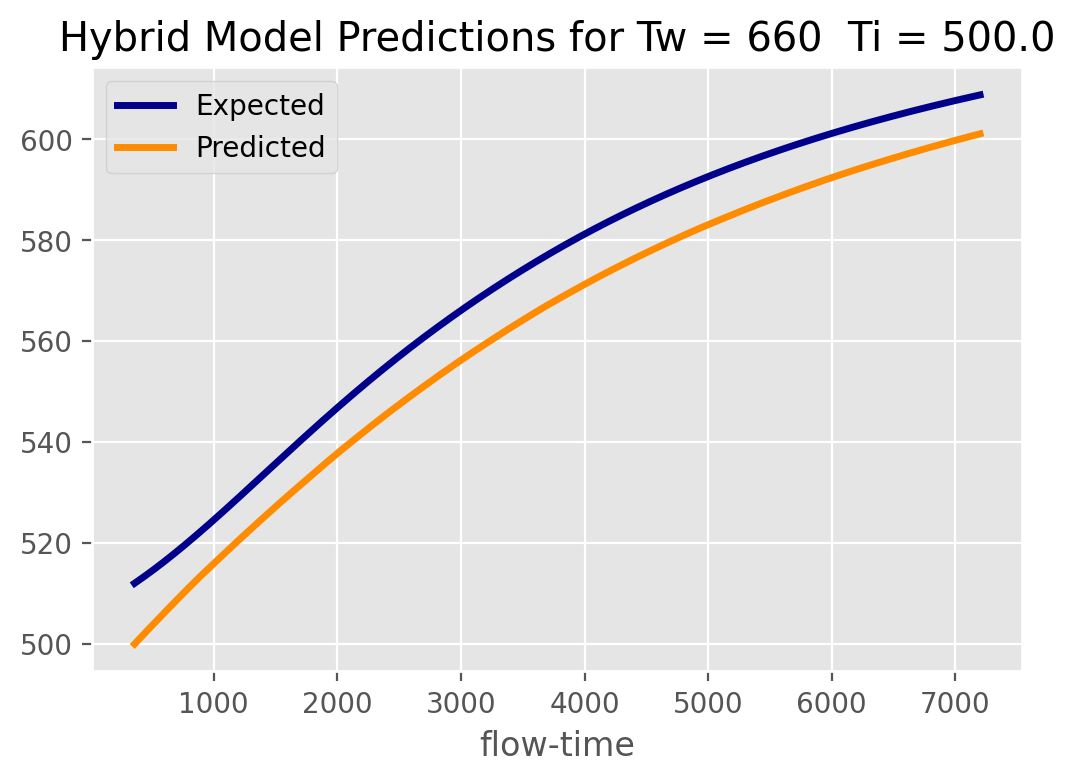

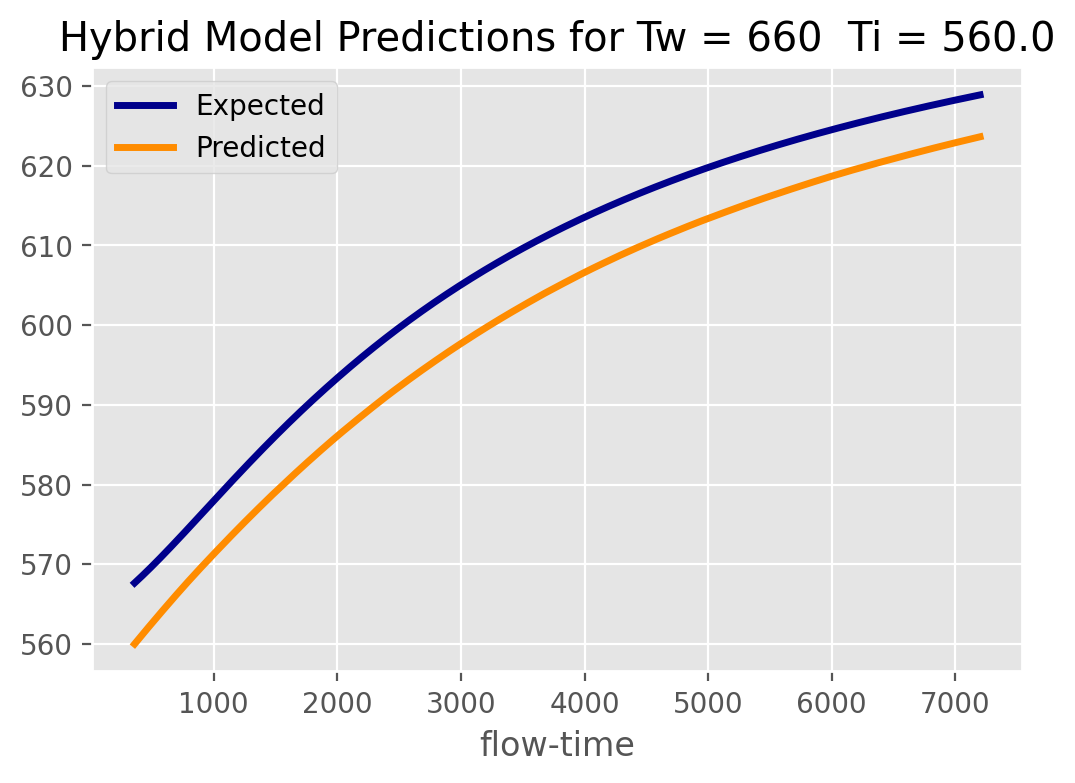

In [15]:
if target == 'Tavg':
    rmse, r2 = get_h_from_T_results(val_df, plot=True)
else:
    rmse, r2, figures = get_T_from_h_results(val_df, plot=True)

#### Print the result metrics from these calculations

In [16]:
print(rmse)

9.84268998771078


In [17]:
print(r2)

0.9721859653613427
